# Importing Libraries

In [7]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import os
import re

# Frames Extraction and Ball Detection

In [11]:
Video_path = "/content/drive/MyDrive/git_upload_clip15.mp4"
frames_path = "/content/drive/MyDrive/Anderson_frames/"

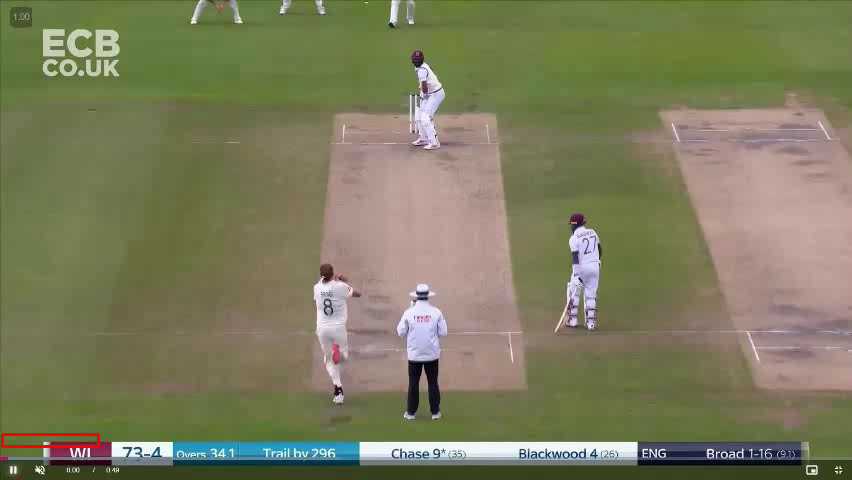

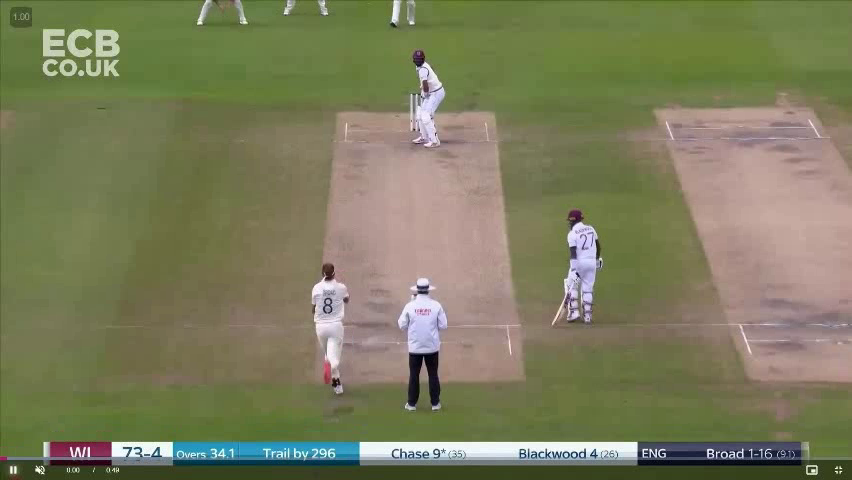

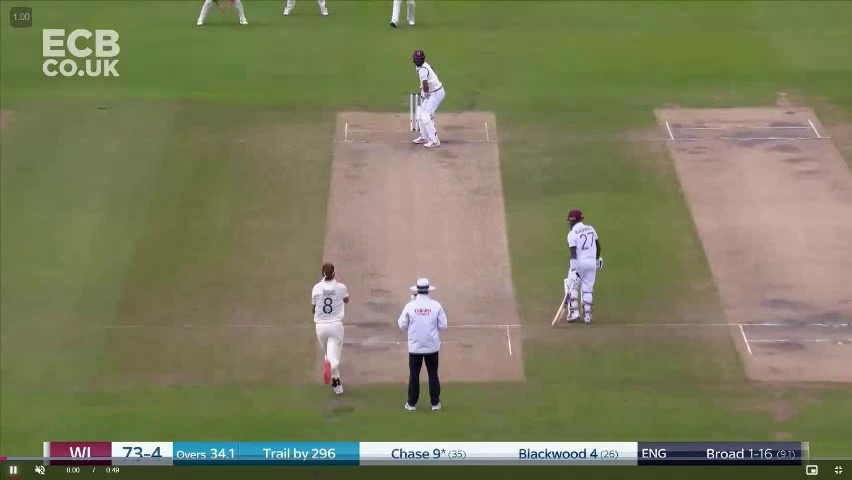

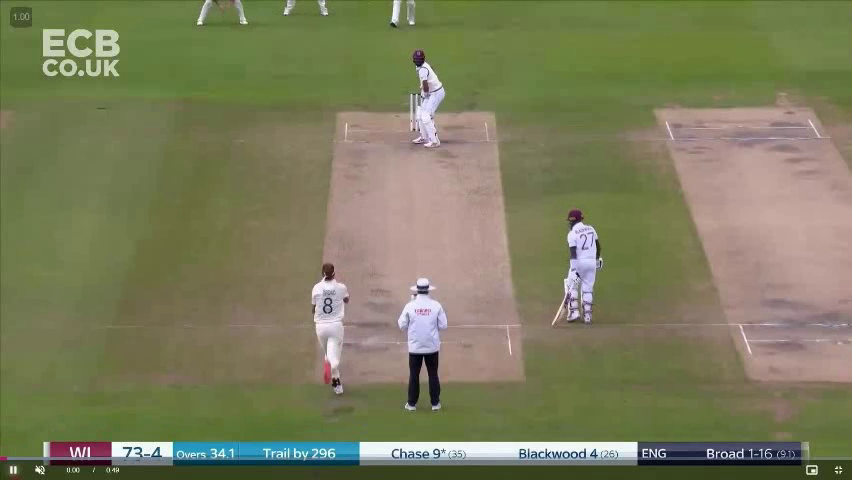

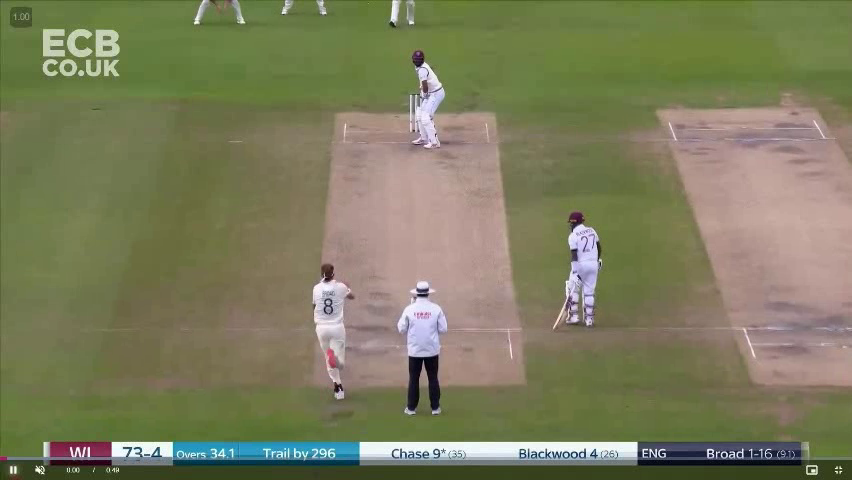

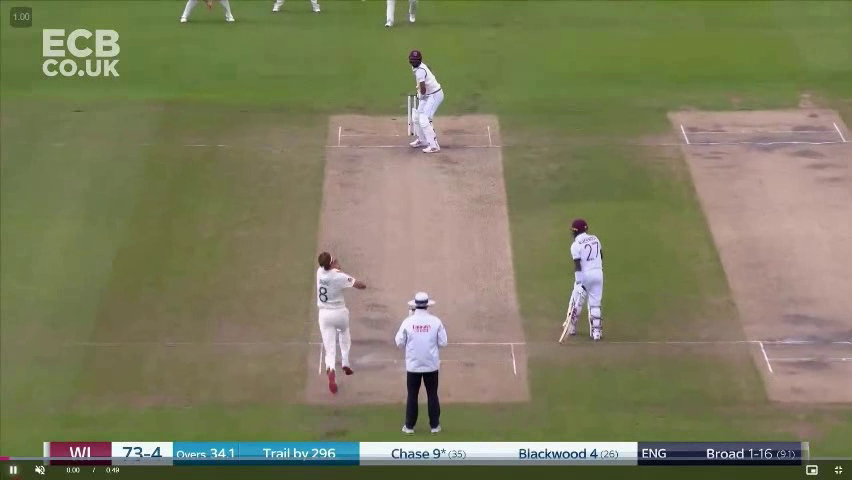

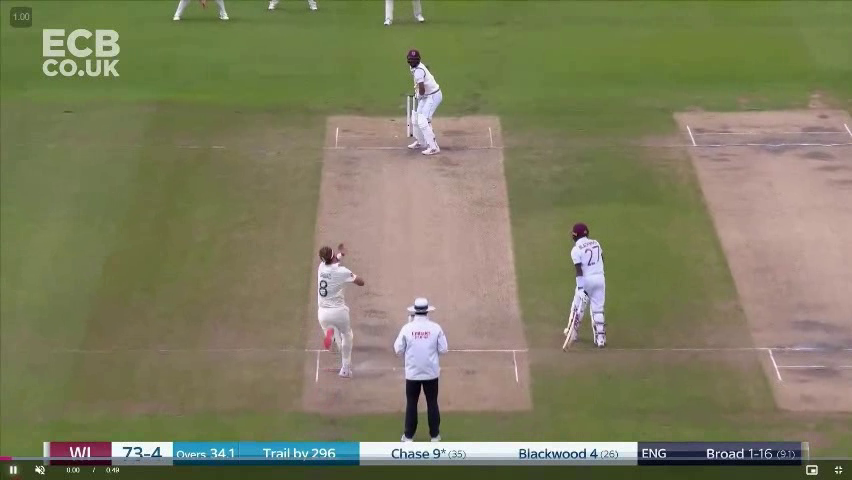

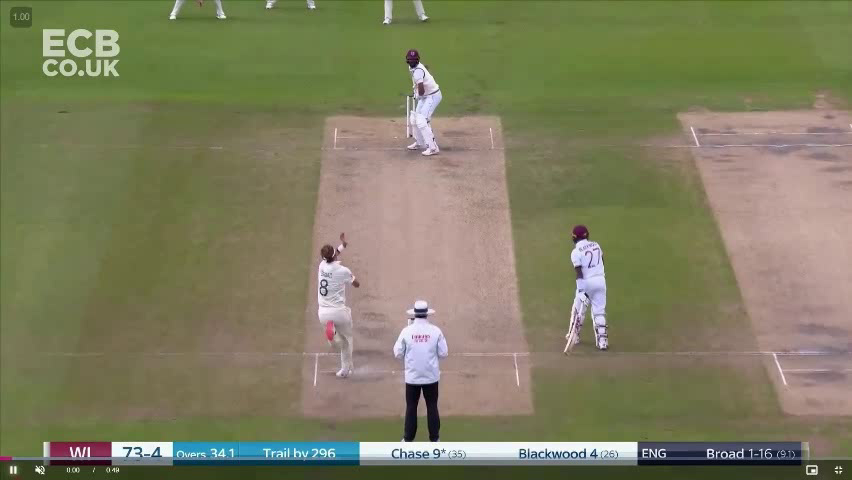

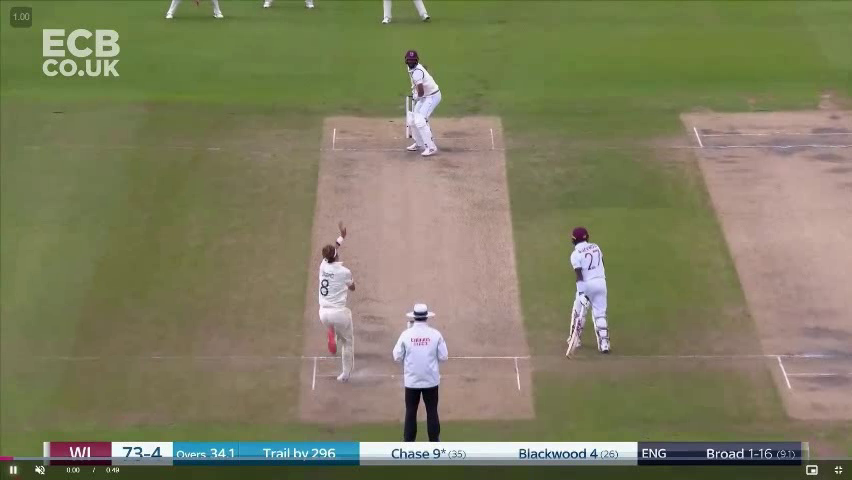

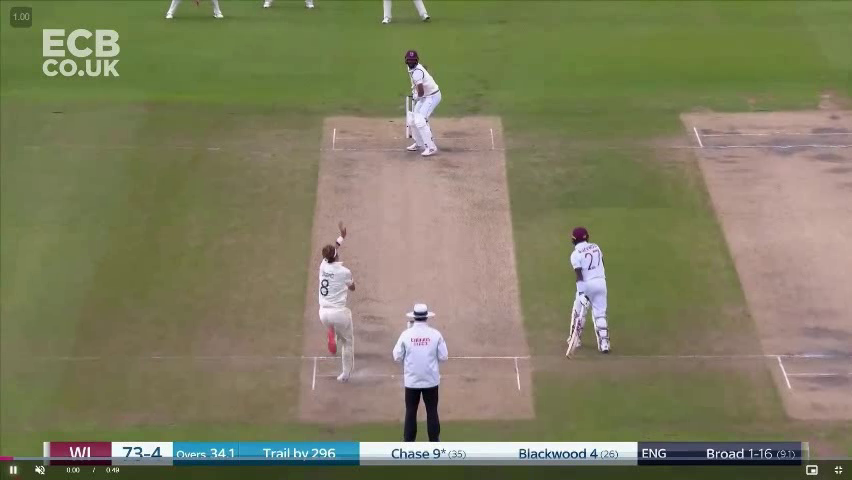

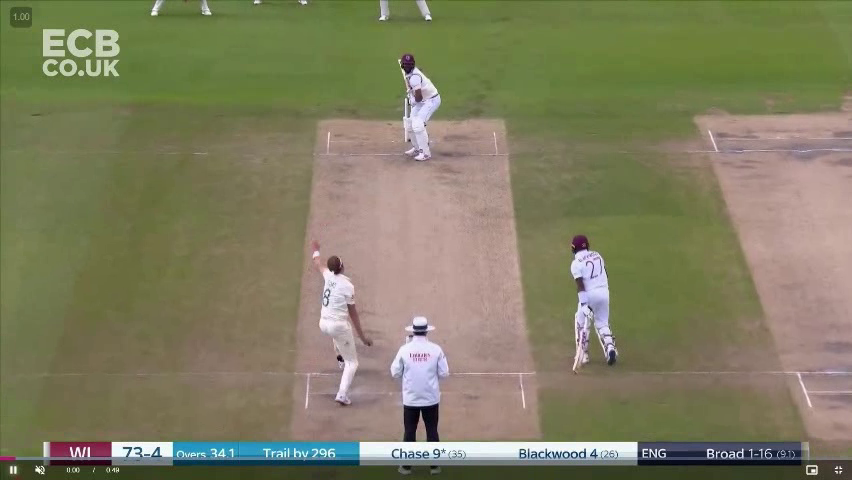

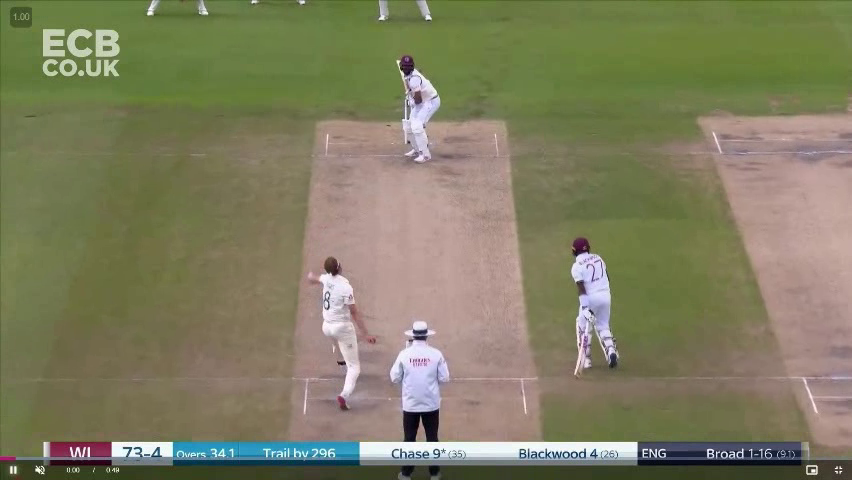

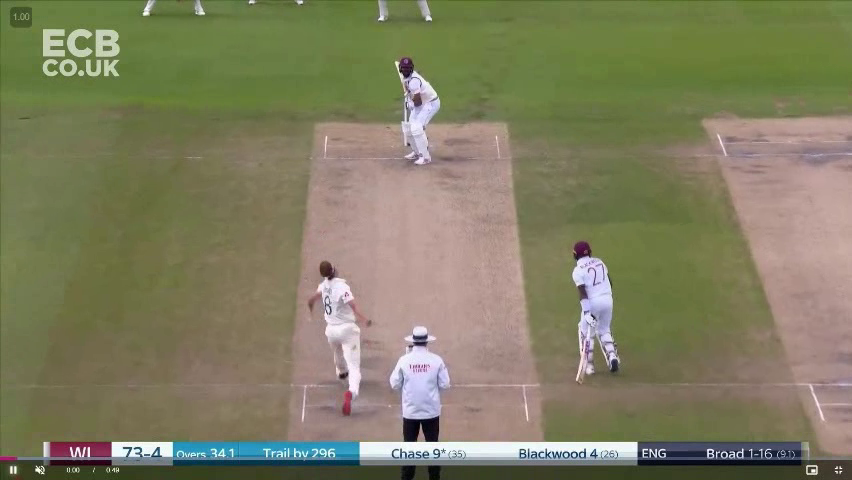

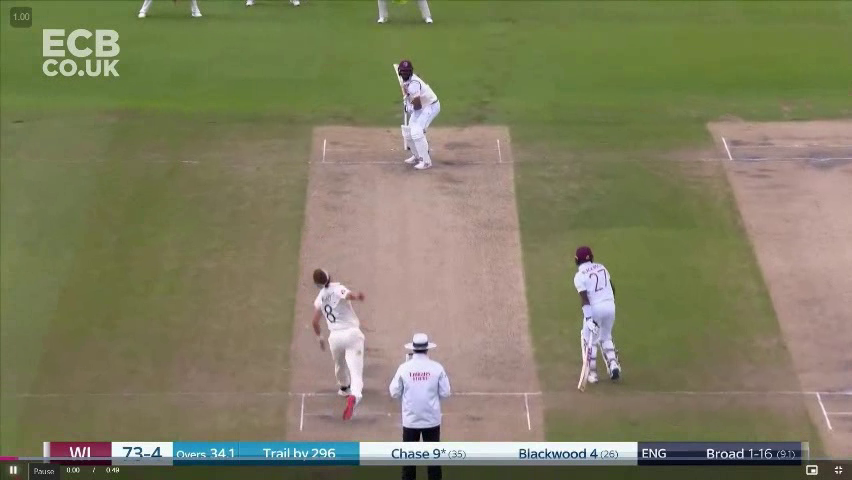

In [ ]:
cap = cv2.VideoCapture(Video_path)
i = 1
while(cap.isOpened()):
    _, img = cap.read()

    crop = img[50:180, 100:300]  
    #hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    #cv2.imshow('img', img)
    #cv2.imshow('hsv', hsv)

    red_lower = np.array([0, 0, 90], np.uint8) 
    #Range can be changed depending on the colour of the ball

    red_upper = np.array([45, 40, 100], np.uint8)
    red_mask = cv2.inRange(img, red_lower, red_upper)

    case = np.ones((5,5), "uint8")

    red_mask = cv2.dilate(red_mask, case)
    rep_red = cv2.bitwise_and(img, img, mask = red_mask)

    contours, hierarchy =cv2.findContours(red_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for pic, contour in enumerate(contours):
        area = cv2.contourArea(contour)
        if(area > 150):
            x, y, w, h = cv2.boundingRect(contour)
            img = cv2.rectangle(img, (x-w, y-h), (x + w, y+h), (0, 0, 255), 2)

    cv2_imshow(img)
    i += 1
    cv2.imwrite(frames_path+str(i)+".jpg",img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Converting Videos Back to Frames

In [13]:
frames = os.listdir(frames_path)
frames.sort(key=lambda f: int(re.sub('\D', '', f)))
frame_array=[]

In [ ]:
for i in range(len(frames)):
    #reading each files
    img = cv2.imread(frames_path+frames[i])
    #cv2_imshow(img)
    #print(img)
    height, width, layers = img.shape
    size = (width,height)
    #inserting the frames into an image array
    frame_array.append(img)

In [ ]:
out = cv2.VideoWriter(Video_path,cv2.VideoWriter_fourcc(*'DIVX'), 25, size)
 
for i in range(len(frame_array)):
    # writing to a image array
    out.write(frame_array[i])

out.release()